In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:

df = pd.read_csv('ForeignGifts_edu.csv', low_memory=False)
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


<Axes: >

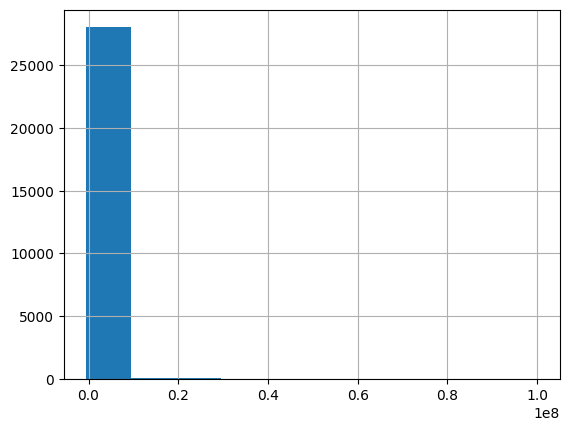

In [3]:
df['Foreign Gift Amount'].hist()

/home/trj/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='gift_ln', ylabel='Density'>

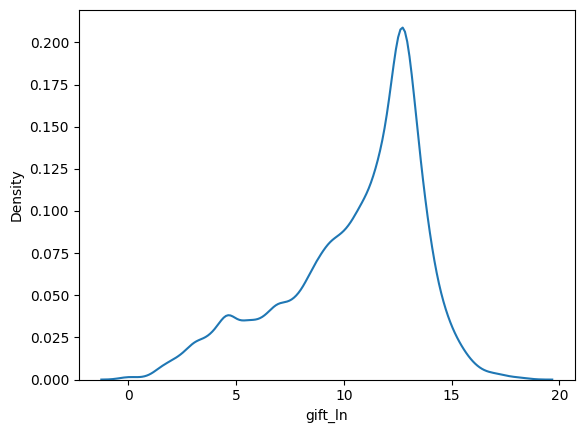

In [36]:
df['gift_ln'] = np.log(df['Foreign Gift Amount'])
sns.kdeplot(data=df, x='gift_ln')

/home/trj/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='gift_ln', ylabel='Density'>

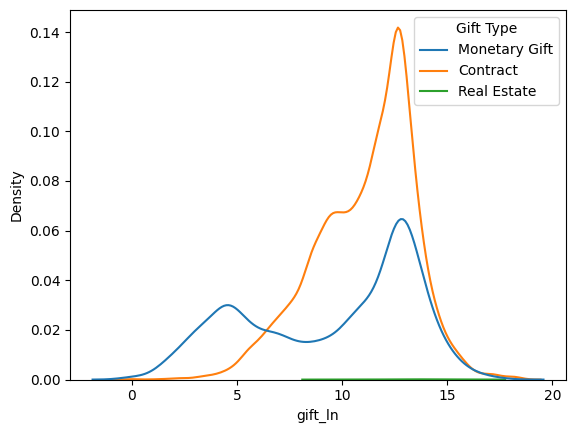

In [35]:
df['gift_ln'] = np.log(df['Foreign Gift Amount'])
sns.kdeplot(data=df, x='gift_ln',hue='Gift Type')

<Axes: >

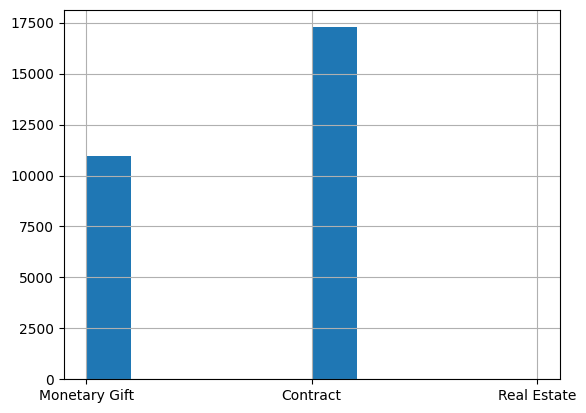

In [4]:
df['Gift Type'].hist()

In [25]:
table = df.loc[:,['Country of Giftor','Foreign Gift Amount']].groupby('Country of Giftor').count()
table.sort_values('Foreign Gift Amount',ascending=False)[:15]



,Foreign Gift Amount
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [29]:
table = df.loc[:,['Country of Giftor','Foreign Gift Amount']].groupby('Country of Giftor').sum()
table.sort_values('Foreign Gift Amount',ascending=False)[:15]


,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [31]:
table = df.loc[:,['Institution Name','Foreign Gift Amount']].groupby('Institution Name').sum()
table.sort_values('Foreign Gift Amount',ascending=False)[:15]




,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


In [39]:
table = df.loc[:,['Institution Name','Foreign Gift Amount']].groupby('Institution Name').sum()
table.sort_values('Foreign Gift Amount',ascending=False)[:15]

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


<Axes: ylabel='Count'>

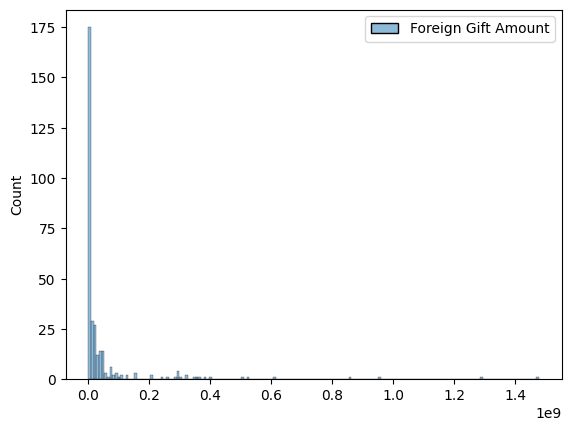

In [40]:
sns.histplot(table)

In [33]:
table = df.loc[:,['Giftor Name','Foreign Gift Amount']].groupby('Giftor Name').sum()
table.sort_values('Foreign Gift Amount',ascending=False)[:20]



,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


In [34]:
table = df.loc[:,['Country of Giftor','Institution Name','Foreign Gift Amount']].groupby(['Institution Name','Country of Giftor']).sum()
table.sort_values('Foreign Gift Amount',ascending=False)[:20]

,,Foreign Gift Amount
Institution Name,Country of Giftor,
Cornell University,QATAR,1018473315
Carnegie Mellon University,BERMUDA,750000000
Texas A&M University,QATAR,504099350
Carnegie Mellon University,QATAR,425410702
Georgetown University,QATAR,327128310
Northwestern University,QATAR,311148564
Brigham Young University,CANADA,259927758
University of Colorado Boulder,UNITED ARAB EMIRATES,219734835
Harvard University,ENGLAND,188328288
